# Portfolio Optimization


### Problem Statement: 
Construct a portfolio of 100K USD with 90% equities and 10% cash. Will construct portfolio of based on the following methods:
1. Equal Weightage Portfolio.
2. Using Machine Learning techniques based on Bottom Up Optimization.
3. Efficient Frontier.

We will build intraday trading stratrgies to maximize profit. We will create the Sharpe Ratio of portfolio to assess statistics.

### Data
* We will be using 5 minutes data over the period of 2018, beginning 01st May, 2018 till 07th October, 2018. We have choosen 05 stocks named as Company 01 to 05. The price information is avialble at an interval of 05 minutes.Though at this point, we’re unsure as to exactly which stocks we will be trading, we will find the solution using Bottom Up Optimization.
* We will use data from 01st May, 2018 - 31st August, 2018 to training our model, and use the remaining period 01st September -07th October, 2018 as test period.

In [106]:
# Import Libraries
#data analysis and manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#statistics and machine learning
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import linregress

# Supress Warning Message
import warnings
warnings.simplefilter('ignore')

# Set Working Directory
import os
os.chdir('C:\\Users\\veera\\Desktop\\Studies\\Projects\\Portfolio_Optimization\\Data')

# Date Time
import datetime

In [141]:
# Import Data
fundamentals = pd.read_csv('Fundamentals.csv')

# Taking a look at all the datasets
fundamentals.head()

,Symbol,Name,P/E,EPS,MarketCap
0,ABC01,Company 01,23.17,8.16,112.74
1,ABC02,Company 02,48.03,0.94,77.76
2,ABC03,Company 03,17.55,3.63,101.52
3,ABC04,Company 04,18.37,6.76,77.29
4,ABC05,Company 05,37.55,1.28,36.13


In [142]:
# Dropping name column
fundamentals.drop('Name',axis=1,inplace=True)

In [143]:
from scipy.spatial.distance import cdist

In [144]:
# Creating our elbow technique method
def find_k(features):
    #intializing a list to hold costs or errors
    costs=[]
    
    #iterating over possible values for k
    for k in range(1,51):
        model=KMeans(n_clusters=k) 
        model.fit(features)
        costs.append(sum(np.min(cdist(features,model.cluster_centers_,'euclidean'),axis=1)))
    
    #plotting our elbow graph    
    with plt.style.context(['classic','ggplot']):
        plt.figure(figsize=(10,6))
        plt.plot(costs)
        plt.xlabel('Clusters')
        plt.ylabel('Errors')
        plt.title('Finding K')
        plt.show()

In [145]:
#making a copy of our original features dataframe
fundamentals_copy=fundamentals.copy()

In [146]:
# Reindexing our features dataframe
fundamentals_copy=fundamentals_copy.reindex(index=fundamentals_copy['Symbol'],columns=fundamentals_copy.columns)

In [147]:
fundamentals_copy.head()

,Symbol,P/E,EPS,MarketCap
Symbol,,,,
ABC01,NaN,NaN,NaN,NaN
ABC02,NaN,NaN,NaN,NaN
ABC03,NaN,NaN,NaN,NaN
ABC04,NaN,NaN,NaN,NaN
ABC05,NaN,NaN,NaN,NaN


In [148]:
# Adding our data back to their respective columns
fundamentals_copy['P/E']=fundamentals['P/E'].values
fundamentals_copy['EPS']=fundamentals['EPS'].values
fundamentals_copy['MarketCap']=fundamentals['MarketCap'].values

In [149]:
fundamentals_copy.head()

,Symbol,P/E,EPS,MarketCap
Symbol,,,,
ABC01,NaN,23.17,8.16,112.74
ABC02,NaN,48.03,0.94,77.76
ABC03,NaN,17.55,3.63,101.52
ABC04,NaN,18.37,6.76,77.29
ABC05,NaN,37.55,1.28,36.13


In [150]:
# Dropping symbol column
fundamentals_copy.drop('Symbol',axis=1,inplace=True)

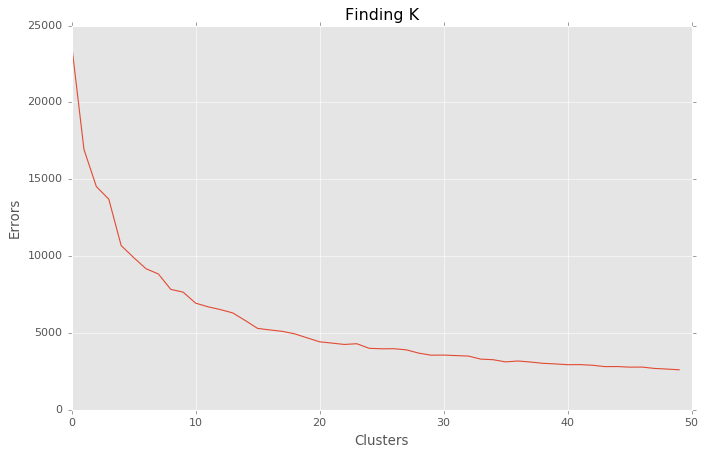

In [151]:
# Finding K
find_k(fundamentals_copy.fillna(0))

In [152]:
# Initialzing K-Means algorithm: with k as 15
kmeans = KMeans(n_clusters=15,random_state=123)

In [153]:
# Fitting kmeans to our fundamentals data
kmeans.fit(fundamentals_copy.fillna(0))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [154]:
# Getting cluster labels
kmeans.labels_

array([12, 12, 12, 12,  8,  5,  0,  5, 11,  0,  5,  8,  5,  1,  5, 11,  5,
        1,  5, 12,  5,  5,  8,  2,  2,  3, 10,  5,  8,  1,  0,  0,  1,  5,
        8,  8,  5, 12,  5,  8,  8,  0,  8, 11, 11, 13,  8,  8, 11,  5, 11,
        7, 11,  0, 11,  8,  8,  5, 11,  1,  7,  5,  8,  8,  8, 11, 11, 11,
        0,  0, 11, 12,  1,  5,  1, 12, 12, 11,  5,  5, 11,  5,  0,  8,  5,
        8,  0,  5,  5,  8, 12,  5,  5,  5,  5, 11,  0, 12, 11,  3,  4,  0,
        5,  8, 11,  5,  5,  3,  3,  5,  5,  8,  5,  5,  3,  8,  0,  3,  5,
        5, 11,  0,  8,  8,  8,  0, 11,  1,  5,  0,  8, 12, 11,  0,  5, 11,
        8,  8,  8,  5, 11,  1,  8, 11, 11,  8,  5,  0,  5, 12,  5,  5,  0,
        0,  5,  5, 11,  8,  8,  8,  8,  5,  8,  8, 11, 11,  0, 11,  5,  6,
       11,  5,  8,  5,  8,  1,  5,  8,  5,  9,  5,  9,  5,  5,  0,  1,  8,
       11, 11,  8,  5,  5,  5,  5, 11, 11,  0,  5,  5,  8, 11, 11, 11,  5,
        0,  7,  8,  8,  0,  5, 12,  1, 12, 11,  5,  0, 11, 11,  5,  5,  5,
        5,  8,  5, 11,  5

In [155]:
# Adding cluster labels to dataframe
fundamentals_copy['Cluster']=kmeans.labels_

In [156]:
# Reviewing fundamentals dataframe
fundamentals_copy.head()

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
ABC01,23.17,8.16,112.74,12
ABC02,48.03,0.94,77.76,12
ABC03,17.55,3.63,101.52,12
ABC04,18.37,6.76,77.29,12
ABC05,37.55,1.28,36.13,8


In [157]:
# Creating dataframe to hold data
clusters_df = pd.DataFrame()
# Grouping our data by cluster for clusters with atleast 2 stocks in it.
clusters_df = pd.concat(i for clusters_df, i in fundamentals_copy.groupby(fundamentals_copy['Cluster']) if len(i) >1)

In [158]:
# Checking the head of clusters df
clusters_df.head()

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
ABC07,51.72,2.32,59.28,0
ABC10,20.37,6.41,45.93,0
ABC31,14.08,5.65,71.72,0
ABC32,NaN,-0.78,62.15,0
ABC42,18.02,9.21,43.89,0


In [131]:
# Creating method to identify each possible pair 
def create_pairs(symbolList):
    #creating a list to hold each possible pair
    pairs=[]
    #initializing placeholders for the symbols in each pair
    x=0
    y=0
    for count,symbol in enumerate(symbolList):
        for nextCount,nextSymbol in enumerate(symbolList):
            x=symbol
            y=nextSymbol
            if x !=y:
                pairs.append([x,y])          
    
    return pairs

In [159]:
# Creating list of symbols from cluster 0
# Now we will use new names for the companies in Cluster 01 as follows:
# 'ABC07': 'COM01'
# 'ABC10': 'COM02'
# 'ABC31': 'COM03'
# 'ABC32': 'COM04'
# 'ABC42': 'COM05'

symbol_list_0=['COM01','COM02','COM03','COM04','COM05']

In [160]:
# List of lists of pairs
all_pairs=create_pairs(symbol_list_0)

In [161]:
# Printing list of all_pairs from cluster 0
all_pairs

[['COM01', 'COM02'],
 ['COM01', 'COM03'],
 ['COM01', 'COM04'],
 ['COM01', 'COM05'],
 ['COM02', 'COM01'],
 ['COM02', 'COM03'],
 ['COM02', 'COM04'],
 ['COM02', 'COM05'],
 ['COM03', 'COM01'],
 ['COM03', 'COM02'],
 ['COM03', 'COM04'],
 ['COM03', 'COM05'],
 ['COM04', 'COM01'],
 ['COM04', 'COM02'],
 ['COM04', 'COM03'],
 ['COM04', 'COM05'],
 ['COM05', 'COM01'],
 ['COM05', 'COM02'],
 ['COM05', 'COM03'],
 ['COM05', 'COM04']]

In [162]:
#initializing our stock variables
COM01=pd.read_csv('Company_07.csv')
COM02=pd.read_csv('Company_10.csv')
COM03=pd.read_csv('Company_31.csv')
COM04=pd.read_csv('Company_32.csv')
COM05=pd.read_csv('Company_42.csv')

In [136]:
# Checking head of COM7
COM01.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,5/1/2018,08:30:00,181.93,183.74,181.84,183.13,83862,396,22941,60921
1,5/1/2018,08:35:00,183.05,183.48,182.66,182.89,31593,238,17840,13753
2,5/1/2018,08:40:00,182.84,183.35,182.70,183.22,49654,345,26962,22692
3,5/1/2018,08:45:00,183.25,183.73,183.06,183.73,51108,314,21566,29542
4,5/1/2018,08:50:00,183.66,184.00,183.56,183.90,27476,196,15287,12189


In [137]:
# Checking head of COM7
COM02.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,5/1/2018,08:30:00,60.42,60.42,60.28,60.36,27675,241,14300,13375
1,5/1/2018,08:35:00,60.38,60.63,60.38,60.61,57163,367,25182,31981
2,5/1/2018,08:40:00,60.68,60.77,60.60,60.77,47235,209,35496,11739
3,5/1/2018,08:45:00,60.80,60.85,60.76,60.81,41935,328,22825,19110
4,5/1/2018,08:50:00,60.81,60.84,60.77,60.80,49213,364,25786,23427


In [138]:
# Checking head of COM7
COM03.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,5/1/2018,08:30:00,181.87,183.45,181.84,183.45,92724,515,21862,70862
1,5/1/2018,08:35:00,183.44,183.84,183.03,183.68,115258,846,57022,58236
2,5/1/2018,08:40:00,183.73,183.96,183.46,183.80,71755,501,37345,34410
3,5/1/2018,08:45:00,183.88,184.12,183.56,183.82,107026,841,50234,56792
4,5/1/2018,08:50:00,183.73,184.17,183.70,183.93,23541,193,11710,11831


In [139]:
# Checking head of COM7
COM04.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,5/1/2018,08:30:00,54.50,54.94,54.47,54.67,594227,2053,143498,450729
1,5/1/2018,08:35:00,54.66,54.79,54.51,54.51,239644,1315,125885,113759
2,5/1/2018,08:40:00,54.52,54.54,54.21,54.25,339909,1881,169387,170522
3,5/1/2018,08:45:00,54.22,54.29,53.98,54.08,251866,1351,155982,95884
4,5/1/2018,08:50:00,54.08,54.28,54.03,54.27,311989,1126,191131,120858


In [140]:
# Checking head of COM7
COM05.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,5/1/2018,08:30:00,229.09,229.75,229.07,229.62,10673,89,1600,9073
1,5/1/2018,08:35:00,229.43,229.97,229.23,229.63,11385,102,6185,5200
2,5/1/2018,08:40:00,229.30,229.85,229.02,229.70,14037,119,10927,3110
3,5/1/2018,08:45:00,229.59,229.85,229.47,229.65,10691,98,5758,4933
4,5/1/2018,08:50:00,229.64,229.89,229.51,229.70,10479,94,6579,3900


In [163]:
# Convert Date string to DateTime format
COM01['Date'] = pd.to_datetime(COM01.Date)
COM02['Date'] = pd.to_datetime(COM02.Date)
COM03['Date'] = pd.to_datetime(COM03.Date)
COM04['Date'] = pd.to_datetime(COM04.Date)
COM05['Date'] = pd.to_datetime(COM05.Date)

In [164]:
# Creating list to hold original data
original_data={'COM01':COM01,'COM02':COM02,'COM03':COM03,'COM04':COM04,
               'COM05':COM05}

In [166]:
# Parse out training period data
# Start and End Date
start = '2018-05-01'
end = '2018-08-29'
training_df=pd.DataFrame()

for count, company in enumerate(symbol_list_0):
    # Making a copy of our original data for each symbol
    copy=original_data[company].copy()
    
    # Reindexing our copied data by Date column
    copy=copy.reindex(index=copy['Date'],columns=copy.columns)
    
    # Restoring values of close column from our original data
    copy[' Close']=original_data[company][' Close'].values
    
    # Parsing out our training period
    copy=copy.loc[start:end][' Close']
    
    # Adding training data to dataframe
    training_df[str(company)]=copy.values

In [167]:
# Let’s check our training dataframe
training_df.head()

,COM01,COM02,COM03,COM04,COM05
0,183.13,60.36,183.45,54.67,229.62
1,182.89,60.61,183.68,54.51,229.63
2,183.22,60.77,183.80,54.25,229.70
3,183.73,60.81,183.82,54.08,229.65
4,183.90,60.80,183.93,54.27,229.70


In [168]:
#creating method to check possible pair combinations
def possible_combinations(n):
    #Parameters#
    ############
    #n- represents the number of items or in our case stocks
    
    possible_pairs=(n*(n-1))
    
    return possible_pairs

In [169]:
#checking possible pair combinations
possible_combinations(5) # we pass in 5 for our 5 stocks

20

In [170]:
from scipy.stats import linregress

In [171]:
def get_cointegrated(all_pairs,training_df):
    '''
    PARAMETERS
    #########
    
    all_pairs - the list of all possible pair combinations from Cluster 0
    training_df - our dataframe holding our stock data for stocks in Cluster 0 over the training period 
    
    '''
    
    #creating a list to hold cointegrated pairs
    cointegrated=[]
    
        
    #iterate over each pair in possible pairs list; pair is a list of our 2 stock symbols
    for count, pair in enumerate(all_pairs):
        try:
            
            #getting data for each stock in pair from training_df
            ols=linregress(training_df[str(pair[1])],training_df[str(pair[0])]) #note scipy's linregress takes in Y then X
                        
            #storing slope or hedge ratio in variable
            slope=ols[0]
            
            
            #creating spread 
            spread=training_df[str(pair[1])]-(slope*training_df[str(pair[0])])
                       
            #testing spread for cointegration
            cadf=adfuller(spread,1)
            
            #checking to see if spread is cointegrated, if so then store pair in cointegrated list
            if cadf[0] < cadf[4]['1%']:
                print('Pair Cointegrated at 99% Confidence Interval')
                #appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['5%']:
                print('Pair Cointegrated at 95% Confidence Interval')
                #appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['10%']:
                print('Pair Cointegrated at 90% Confidence Interval')
                cointegrated.append(pair[0],pair[1])
            else:
                print('Pair Not Cointegrated ')
                continue
        except:
            print('Exception: Symbol not in Dataframe')
            continue
        
    return cointegrated

In [172]:
#getting our cointegrated pairs
cointegrated_from_cluster_0=get_cointegrated(all_pairs,training_df)

Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 


In [173]:
cointegrated_from_cluster_0
#  Found that 3 of our possible 20 pairs are cointegrated each at the 90% confidence interval.

[['COM01', 'COM05'], ['COM03', 'COM05'], ['COM05', 'COM03']]

In [174]:
# Importing the Counter method
from collections import Counter

In [175]:
# Calling Counter method on our clusters
Counter(clusters_df['Cluster'])

Counter({0: 47,
         1: 30,
         2: 3,
         3: 19,
         5: 166,
         6: 3,
         7: 5,
         8: 99,
         9: 4,
         11: 88,
         12: 36,
         14: 2})

In [176]:
#adding Symbol Column back to cluster_df
clusters_df['Symbol']=clusters_df.index

In [177]:
#checking update to cluster_df
clusters_df.head()

,P/E,EPS,MarketCap,Cluster,Symbol
Symbol,,,,,
ABC07,51.72,2.32,59.28,0,ABC07
ABC10,20.37,6.41,45.93,0,ABC10
ABC31,14.08,5.65,71.72,0,ABC31
ABC32,NaN,-0.78,62.15,0,ABC32
ABC42,18.02,9.21,43.89,0,ABC42


### Portfolio Construction: Equal Weighted
We'll assume that we have a portfolio value of 100k USD with 10 percent in cash.
We will allocate $30k USD to each of our pairs. To begin we will create a class that will allow us to create our StatArb strategies.

In [178]:
#creating copies of our data - COM01, COM03 and COM05
COM01_copy=COM01.copy()
COM03_copy=COM03.copy()
COM05_copy=COM05.copy()

In [179]:
#reindexing our data
COM01_copy=COM01_copy.reindex(index=COM01_copy['Date'],columns=COM01_copy.columns)
COM03_copy=COM03_copy.reindex(index=COM03_copy['Date'],columns=COM03_copy.columns)
COM05_copy=COM05_copy.reindex(index=COM05_copy['Date'],columns=COM05_copy.columns)

In [180]:
# Dropping date columns
COM01_copy.drop('Date',axis=1,inplace=True)
COM03_copy.drop('Date',axis=1,inplace=True)
COM05_copy.drop('Date',axis=1,inplace=True)

In [181]:
#restoring our column values back to our data
COM01_copy[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']]=COM01[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']].values
COM03_copy[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']]=COM03[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']].values
COM05_copy[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']]=COM05[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']].values

In [182]:
# Rechecking our dataframe
COM01_copy.head()

,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
Date,,,,,,,,,
2018-05-01,08:30:00,181.93,183.74,181.84,183.13,83862,396,22941,60921
2018-05-01,08:35:00,183.05,183.48,182.66,182.89,31593,238,17840,13753
2018-05-01,08:40:00,182.84,183.35,182.70,183.22,49654,345,26962,22692
2018-05-01,08:45:00,183.25,183.73,183.06,183.73,51108,314,21566,29542
2018-05-01,08:50:00,183.66,184.00,183.56,183.90,27476,196,15287,12189


In [184]:
# Creating variables to hold testing period data
COM01_test=COM01_copy.loc['2018-09-01':]
COM03_test=COM03_copy.loc['2018-09-01':]
COM05_test=COM05_copy.loc['2018-09-01':]

In [186]:
# Closing price series for data
COM01_test_price_series=np.array(COM01_test[' Close'])
COM03_test_price_series=np.array(COM03_test[' Close'])
COM05_test_price_series=np.array(COM05_test[' Close'])

In [190]:
# Checking head of COM01 price series
COM01_test_price_series[0:5]

array([229.87, 229.58, 230.12, 230.22, 230.56])

In [ ]:
# Construct our StatArb class and create our individual strategies. 
# We will then combine these individual strategies into an equally weighted portfolio.

In [191]:
class statarb(object):
    
    def __init__(self,df1, df2,ma,floor, ceiling,beta_lookback,start,end,exit_zscore=0):
        #setting the attributes 
        self.df1=df1 #array of prices for X
        self.df2=df2 #array of prices for Y
        self.ma=ma# the lookback period 
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        
    #create price spread
    def create_spread(self):
        
        #creating new dataframe
        self.df=pd.DataFrame(index=range(0,len(self.df1)))
        
        try:
            self.df['X']=self.df1
            self.df['Y']=self.df2
        except:
            print('Length of self.df:')
            print(len(self.df))
            print('')
            print('Length of self.df1:')
            print(len(self.df1))
            print('')
            print('Length of self.df2:')
            print(len(self.df2))
            
        
        #calculating the beta of the pairs 
        ols=linregress(self.df['Y'],self.df['X'])
        self.df['Beta']=ols[0]
        
        #calculating the spread
        self.df['Spread']=self.df['Y']-(self.df['Beta'].rolling(window=self.beta_lookback).mean()*self.df['X'])
            
            
            
            
        return self.df.head()
    
            
    def generate_signals(self):
        

            #creating the z-score
            self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()

            #prior z-score
            self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)

            #Creating Buy and Sell Signals; when to be long, short, exit
            self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
            self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
            self.df['Exit']=(np.abs(self.df['Z-Score'])<=self.exit_zscore)*1.0

            #tracking positions via for loop implementation
            self.df['Long_Market']=0.0
            self.df['Short_Market']=0.0

            #Setting Variables to track whether or not to be long while iterating over df
            self.long_market=0
            self.short_market=0

            #Determining when to trade
            for i,value in enumerate(self.df.iterrows()):
                #Calculate longs
                if value[1]['Longs']==1.0:
                    self.long_market=1

                if value[1]['Shorts']==1.0:
                    self.short_market=1

                if value[1]['Exit']==1.0:

                    self.long_market=0
                    self.short_market=0

                self.df.iloc[i]['Long_Market']=self.long_market
                self.df.iloc[i]['Short_Market']=self.short_market


        
            return 
        
    def create_returns(self, allocation,pair_number):
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()


            return

In [211]:
# COM01 & COM05 statarb initialization
# Passing in X, Y, MA, Floor, Ceiling, Beta Lookback, Start, End
COM01_COM05 = statarb(COM01_test_price_series, COM05_test_price_series,17,-2,2,17,COM01_test.iloc[0],COM01_test.iloc[-1])

In [212]:
#creating spread
COM01_COM05.create_spread()

,X,Y,Beta,Spread
0,229.87,233.31,-0.409962,NaN
1,229.58,232.37,-0.409962,NaN
2,230.12,232.22,-0.409962,NaN
3,230.22,232.47,-0.409962,NaN
4,230.56,231.93,-0.409962,NaN


In [213]:
# Generating signals
COM01_COM05.generate_signals()

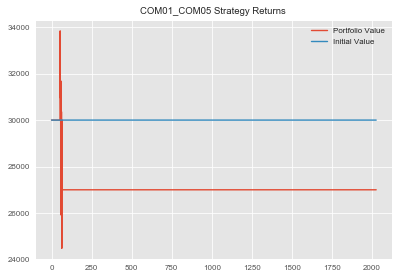

In [214]:
# Creating returns and passing in our allocation amount
COM01_COM05.create_returns(30000,'COM01_COM05')

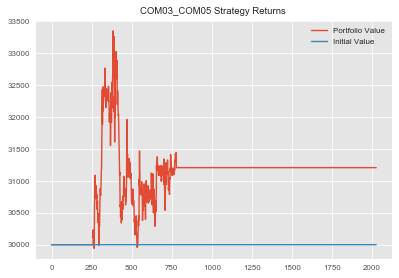

In [197]:
# Repeating process for COM03 and COM05
COM03_COM05 = statarb(COM03_test_price_series,COM05_test_price_series,6,-2,2,6,COM03_test.iloc[0],COM03_test.iloc[-1])
COM03_COM05.create_spread()
COM03_COM05.generate_signals()
COM03_COM05.create_returns(30000,'COM03_COM05')

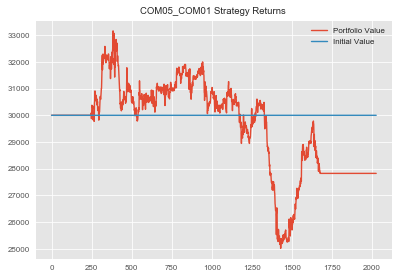

In [203]:
# Repeating process for COM05 and COM03
COM05_COM03 = statarb(COM05_test_price_series,COM03_test_price_series,6,-2,2,6,COM05_test.iloc[0],COM05_test.iloc[-1])
COM05_COM03.create_spread()
COM05_COM03.generate_signals()
COM05_COM03.create_returns(30000,'COM05_COM01')

In [205]:
# Creating dataframe for equally weighted portfolio
equally_weighted=pd.DataFrame()
equally_weighted['COM01_COM05']=COM01_COM05.portfolio['Portfolio Value']
equally_weighted['COM03_COM05']=COM03_COM05.portfolio['Portfolio Value']
equally_weighted['COM05_COM03']=COM05_COM03.portfolio['Portfolio Value']
equally_weighted['Cash']=10000
equally_weighted['Total Portfolio Value']=equally_weighted['COM01_COM05']+equally_weighted['COM03_COM05']+equally_weighted['COM05_COM03']+equally_weighted['Cash']

In [218]:
# Adding returns column
equally_weighted['Returns']=np.log(equally_weighted['Total Portfolio Value']/equally_weighted['Total Portfolio Value'].shift(1))

In [225]:
# Rechecking our dataframe
equally_weighted.head()

,COM01_COM05,COM03_COM05,COM05_COM03,Cash,Total Portfolio Value,Returns
0,30000.0,30000.0,30000.0,10000,100000.0,NaN
1,30000.0,30000.0,30000.0,10000,100000.0,0.0
2,30000.0,30000.0,30000.0,10000,100000.0,0.0
3,30000.0,30000.0,30000.0,10000,100000.0,0.0
4,30000.0,30000.0,30000.0,10000,100000.0,0.0


In [220]:
# Initializing Equally_Weighted portfolio metrics
equally_weighted_mu=equally_weighted['Returns'].mean()
equally_weighted_sigma=equally_weighted['Returns'].std()

# Initializing interest rate assumption of 1.5%
rate=0.015

# Computing Sharpe
equally_weighted_Sharpe=round((equally_weighted_mu-rate)/equally_weighted_sigma,2)

In [221]:
# Getting Equally Weighted Portfolio Sharpe
print('Equally Weighted Portfolio Sharpe:',equally_weighted_Sharpe)

Equally Weighted Portfolio Sharpe: -4.55


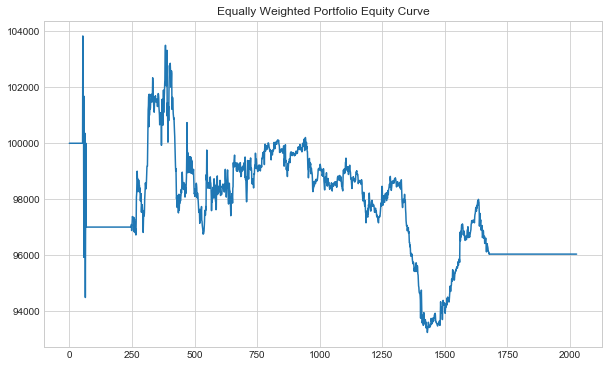

In [222]:
# Plotting Equally Weighted Equity Curve
plt.figure(figsize=(10,6))
plt.plot(equally_weighted['Total Portfolio Value'])
plt.title('Equally Weighted Portfolio Equity Curve')
plt.show()

### Portfolio Construction based on Bottom Up Optimization:
* It applies machine learning to the composition of the equally weighted portfolio. This means that we will use equal weights and use bottom-up optimization. The optimization can also be done using Efficient Frontier methodology. 
* The idea is to have our Gaussian Mixture Model identify specific regimes or distributions. We can then use our GMM’s predictions as labels for our Random Forests. 
* Our signal generator will then trade based only when our strategy is within a regime in which it historically has not underperformed.

### Step 1: Feature Engineering
* We will track the volatility of each of our underlying components.
* We will dvide our training dataset into train and test datasets (80-20)

In [226]:
# Checking length of training_df
len(training_df)

6552

In [227]:
# Computing 80% of training_df length
round(len(training_df)*.80)

5242

In [228]:
# Computing 20% of training_df length
round(len(training_df)*-.20)

-1310

In [229]:
# Create our Company 01 and 05 implementation
# Passing in X, Y, MA, Floor, Ceiling, Beta Lookback, Start, End
COM01_COM05_historical=statarb(training_df['COM01'],training_df['COM05'],17,-2,2,17,COM01_test.iloc[0],
                                 COM01_test.iloc[-1])

In [230]:
COM01_COM05_historical.create_spread()

,X,Y,Beta,Spread
0,183.13,229.62,-0.838867,NaN
1,182.89,229.63,-0.838867,NaN
2,183.22,229.70,-0.838867,NaN
3,183.73,229.65,-0.838867,NaN
4,183.90,229.70,-0.838867,NaN


In [231]:
COM01_COM05_historical.generate_signals()

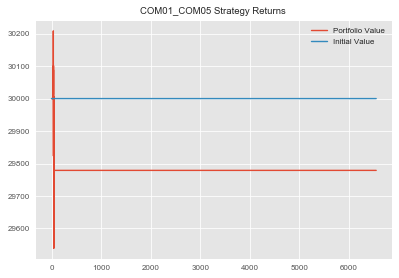

In [232]:
# Creating returns and passing in our allocation amount
COM01_COM05_historical.create_returns(30000,'COM01_COM05')

In [233]:
COM01_COM05_historical_rets=COM01_COM05_historical.portfolio['Returns']

In [234]:
# Checking head of returns
COM01_COM05_historical_rets.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Returns, dtype: float64

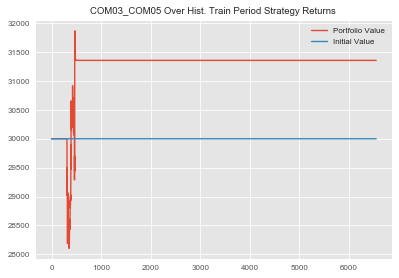

In [236]:
# COM03_COM05 Bottom Up Historical Implementation
COM03_COM05_historical=statarb(training_df['COM03'],training_df['COM05'],6,-2,2,6,COM03_test.iloc[0],COM03_test.iloc[-1])
COM03_COM05_historical.create_spread()
COM03_COM05_historical.generate_signals()
COM03_COM05_historical.create_returns(30000,'COM03_COM05 Over Hist. Train Period')
COM03_COM05_historical_rets = COM03_COM05_historical.portfolio['Returns']

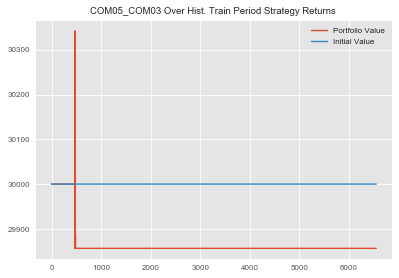

In [237]:
# COM05_COM03 Bottom Up Historical Implementation
COM05_COM03_historical=statarb(training_df['COM05'],training_df['COM03'],6,-2,2,6,COM05_test.iloc[0],COM05_test.iloc[-1])
COM05_COM03_historical.create_spread()
COM05_COM03_historical.generate_signals()
COM05_COM03_historical.create_returns(30000,'COM05_COM03 Over Hist. Train Period')
COM05_COM03_historical_rets=COM05_COM03_historical.portfolio['Returns']

### Step 3: Using Gaussian Mixture Model to Identify Historical Regimes

In [241]:
# Splitting historical returns data
# COM01_COM05
# Getting length of returns data
COM01_COM05_rets_len=len(COM01_COM05_historical_rets)
COM01_COM05_rets_train=COM01_COM05_historical_rets[0:5242]
COM01_COM05_rets_test=COM01_COM05_historical_rets[-1310:]

# COM03_COM05
# Getting length of returns data
COM03_COM05_rets_len=len(COM03_COM05_historical_rets)
COM03_COM05_rets_train=COM03_COM05_historical_rets[0:5242]
COM03_COM05_rets_test=COM03_COM05_historical_rets[-1310:]

# COM05_COM03
# Getting length of returns data
COM05_COM03_rets_len=len(COM05_COM03_historical_rets)
COM05_COM03_rets_train=COM05_COM03_historical_rets[0:5242]
COM05_COM03_rets_test=COM05_COM03_historical_rets[-1310:]

In [258]:
# We'll start by training our GMM on our training period data, then we'll apply it to our testing period data.
# Class for GMM & Random Forest
class gmm_randomForests(object):
    def __init__(self,historical_rets_train,historical_rets_test,base_portfolio_rets,gmm_components,df,base_portfolio_df,
                 internal_test_start,internal_test_end):

            '''
            PARAMETERS
            ##########
            The first 3 parameters should have already been sliced from the
            entire sample; ie specific dates parsed from dataframe that contains
            trade history, returns, and features; other features will be added
            later in development within the object
            
            historical_rets_train- the returns data over the historical period used to train on
                                this is the internal train of the internal 80/20 split;the 80%
                                of the total historical training set
                                
            historical_rets_test- retuns data for 20% of internal training test set
            
            base_portfolio_rets - this is our figurative live data;ie returns; 9/01/18-10/07/18 from either
                                Equally Weighted or Efficient Frontier Portfolios dependent upon implementation
                                of Bottom Up or SPO Framework
            
            ex. data over 05/01/18-08/29/18
            we would first split this 80/20
            the 80% is our training set
            the 20% is our testing set
            
            we would then do another split on our training set created above
            this is so that if we can better understand the historical
            regimes and recalibrate our models if necessary before actually
            predicting our 9/01/18-10/07/18 testing set
            
            in this ex. our gmm_training_train is 80% of the period 05/01/18-08/29/18
            our gmm_training_test is 20% of the period 05/01/18-08/29/18 and our 
            gmm_test_actual is 9/01/18-10/07/18
            
            gmm_components - type:int; for number of components for GMM
            
            df - the entire dataframe containing prior trading history; the dataframe from either Equally Weighted or 
                 Efficient Frontier Portfolios; Our Random Forests Implementation will take this dataframe created by
                 our statarb class(i.e. from the prior portfolios) and add our features to it. It will then use these 
                 features to predict the regimes of our test period. Recall that our Equally Weighted and Efficient 
                 Frontier Portfolios were constructed over our assessment period of 9/1/18 to 10/07/18. We will then
                 be able to store our predictions in a varible for our test period. These predictions will be passed 
                 into a new statarb object as a parameter and be used to create the Bottom Up and SPO Framework Portfolios.
            
            total_training_start- type: string; the beginning of the historical period for analysis; input as string
                                    from example above would be 2012
            
            total_training_end - type:string; the end of the historical period for analysis; input as string;
                                    from example above would be 2017
                                    
            base_portfolio_df - (i.e.adbe_antm.df,etc)Note: for the Bottom Up Implementation this df would be the Equally Weighted df but for the 
                            SPO Framework df this would be the df from the Efficient Frontier implementation
            
            internal_test_start- type:int; this is the testing period for the total training period; in the example,
                                this is the assessment period of 09/01/18-10/07/18; start thus is len(strategy_object)*.80
                                
                                
            internal_test_end - type:int; this is the end of the assessment period; ie. the 20% testing split
                                of the broader split...this value is -len(strategy_object)*.20...Note this value is 
                                is negative because we want the last 20% of the data
                                                    
                                The last two methods are created as such because our Equally Weighted and Efficient Frontier 
                                Portfolios are not indexed by dates but are indexed by a sequence of ints. This means 
                                that in a later method(i.e. Random Forests) we have to pass in the int value of the index
                                position we want to parse
            '''
            self.historical_rets_train=historical_rets_train
            self.historical_rets_test=historical_rets_test
            self.base_portfolio_rets=base_portfolio_rets
            self.gmm_components=gmm_components
            self.max_iter=300
            self.random_state=101
            self.df=df
            #self.total_training_start=total_training_start
            #self.total_training_end=total_training_end
            self.base_portfolio_df=base_portfolio_df
            self.internal_test_start=internal_test_start
            self.internal_test_end=internal_test_end
            #creating volatility
            self.volatility=self.historical_rets_train.rolling(window=5).std()
            self.negative_volatility=np.where(self.historical_rets_train<0,self.historical_rets_train.rolling(window=5).std(),0)
        
            
    def make_gmm(self):
        model_kwds=dict(n_components=self.gmm_components,max_iter=self.max_iter,n_init=100,random_state=self.random_state)
        
        gmm=GM(**model_kwds)
        
        return gmm
    
    def analyze_historical_regimes(self):
        #Creating a Gaussian Mixture Model
        self.gmm=self.make_gmm()
        
        #instantiating the XTrain as the gmm_training_train; (i.e. the 80% of total training period)
        self.gmm_XTrain=np.array(self.historical_rets_train).reshape(-1,1)
        
        #Fitting the GMM on the Training Set(note this is the internal training set within the broader training set)
        self.gmm.fit(self.gmm_XTrain.astype(int))
        
        #Making predictions on the historical period; ie. the gmm_training_train
        self.gmm_historical_predictions=self.gmm.predict(self.gmm_XTrain.astype(int))
        
        #Making Predictions on the gmm_training_test (i.e. the 20% of total training period;)
        self.gmm_XTest=np.array(self.historical_rets_test).reshape(-1,1)
        self.gmm_training_test_predictions=self.gmm.predict(self.gmm_XTest.astype(int))
        
        #Fitting the Model on ACTUAL data we want to Predict Regimes For
        self.gmm_Actual=np.array(self.base_portfolio_rets).reshape(-1,1)
        self.base_portfolio_predictions=self.gmm.predict(self.gmm_Actual)
        
        
        return

    def historical_regime_returns_volatility(self,plotTitle):
        self.plotTitle=plotTitle
        data=pd.DataFrame({'Volatility':self.volatility,'Regime':self.gmm_historical_predictions,'Returns':self.historical_rets_train})
        
        with plt.style.context(['classic','seaborn-paper']):
            fig,ax=plt.subplots(figsize=(15,10),nrows=1, ncols=2)
            
            left   =  0.125  # the left side of the subplots of the figure
            right  =  0.9    # the right side of the subplots of the figure
            bottom =  .125    # the bottom of the subplots of the figure
            top    =  0.9    # the top of the subplots of the figure 
            wspace =  .5     # the amount of width reserved for blank space between subplots
            hspace =  1.1    # the amount of height reserved for white space between subplots
            # function that adjusts subplots using the above paramters
            plt.subplots_adjust(
                left    =  left, 
                bottom  =  bottom, 
                right   =  right, 
                top     =  top, 
                wspace  =  wspace, 
                hspace  =  hspace
            )
            
            # The amount of space above titles
            y_title_margin = 2
            
            plt.suptitle(self.plotTitle, y = 1, fontsize=20)
            
            plt.subplot(121)
            sns.swarmplot(x='Regime',y='Volatility',data=data)#,ax=ax[0][0])
            plt.title('Regime to Volatility')
            
            plt.subplot(122)
            sns.swarmplot(x='Regime',y='Returns',data=data)#, ax=ax[0][1]) 
            plt.title('Regime to Returns')
            plt.tight_layout()
            plt.show()
            
            return

                
    def train_random_forests(self):
            #adding Features to the DataFrame
            #assumption is that this is the df 
            #over the entire period
            
            '''CAN UNCOMMENT THE SELF.VIX CODE TO INCLUDE VIX IN ANALYSIS..NOTE CHANGES TO PANDAS_DATAREADER API'''
            #getting vix to add as feature
            #self.VIX=pdr.get_data_yahoo('^VIX',start=self.total_training_start,end=self.total_training_end)

            #creating features
            #self.df['VIX']=self.VIX['Close']
            self.df['6 X Vol']=self.df['X'].rolling(window=6).std()
            self.df['6 Y Vol']=self.df['Y'].rolling(window=6).std()
            self.df['6 Spread Vol']=self.df['Spread'].rolling(window=6).std()
            self.df['6 Z-Score Vol']=self.df['Z-Score'].rolling(window=6).std()

            self.df['12 X Vol']=self.df['X'].rolling(window=12).std()
            self.df['12 Y Vol']=self.df['Y'].rolling(window=12).std()
            self.df['12 Spread Vol']=self.df['Spread'].rolling(window=12).std()
            self.df['12 Z-Score Vol']=self.df['Z-Score'].rolling(window=12).std()

            self.df['15 X Vol']=self.df['X'].rolling(window=15).std()
            self.df['15 Y Vol']=self.df['Y'].rolling(window=15).std()
            self.df['15 Spread Vol']=self.df['Spread'].rolling(window=15).std()
            self.df['15 Z-Score Vol']=self.df['Z-Score'].rolling(window=15).std()
            
            #adding features to our historical df
            #self.base_portfolio_df['VIX']=self.VIX['Close']
            self.base_portfolio_df['6 X Vol']=self.df['X'].rolling(window=6).std()
            self.base_portfolio_df['6 Y Vol']=self.df['Y'].rolling(window=6).std()
            self.base_portfolio_df['6 Spread Vol']=self.df['Spread'].rolling(window=6).std()
            self.base_portfolio_df['6 Z-Score Vol']=self.df['Z-Score'].rolling(window=6).std()

            self.base_portfolio_df['12 X Vol']=self.df['X'].rolling(window=12).std()
            self.base_portfolio_df['12 Y Vol']=self.df['Y'].rolling(window=12).std()
            self.base_portfolio_df['12 Spread Vol']=self.df['Spread'].rolling(window=12).std()
            self.base_portfolio_df['12 Z-Score Vol']=self.df['Z-Score'].rolling(window=12).std()

            self.base_portfolio_df['15 X Vol']=self.df['X'].rolling(window=15).std()
            self.base_portfolio_df['15 Y Vol']=self.df['Y'].rolling(window=15).std()
            self.base_portfolio_df['15 Spread Vol']=self.df['Spread'].rolling(window=15).std()
            self.base_portfolio_df['15 Z-Score Vol']=self.df['Z-Score'].rolling(window=15).std()


            #replacing na values
            self.df.fillna(0, inplace=True)
            #Creating X_Train for RF over the Historical Period; Will train
            #over Historical period, ie. self.historical_training_start/end
            #then predict 
            self.RF_X_TRAIN=self.df[0:5242][['6 X Vol','6 Y Vol','6 Spread Vol','6 Z-Score Vol','12 X Vol','12 Y Vol',
                                               '12 Spread Vol','12 Z-Score Vol','15 X Vol','15 Y Vol','15 Spread Vol','15 Z-Score Vol']]
            #dropping unnecessary columns from train data
            #self.RF_X_TRAIN.drop(['X','Y','Longs','Shorts','Exit','Long_Market','Short_Market'],inplace=True,axis=1)
            
            #setting Y_Train for the RF to the predictions of GMM over historical period
            self.RF_Y_TRAIN=self.gmm_historical_predictions

            #Creating X_Test for the RF; ie the gmm_training_test period
            #our features for RF
            #that haven't been seen by the model
            self.RF_X_TEST=self.base_portfolio_df[['6 X Vol','6 Y Vol','6 Spread Vol','6 Z-Score Vol','12 X Vol','12 Y Vol',
                                               '12 Spread Vol','12 Z-Score Vol','15 X Vol','15 Y Vol','15 Spread Vol','15 Z-Score Vol']]\
            
            #dropping unnecessary columns from train data
            #self.RF_X_TEST.drop(['X','Y','Longs','Shorts','Exit','Long_Market','Short_Market'],inplace=True,axis=1)

            #predictions for the x test over the internal testing period
            self.RF_Y_TEST=self.base_portfolio_predictions #regime predictions for base portfolio

            #build the RandomForest and check precision
            self.RF_MODEL=RF(n_estimators=100) #Recall imported RandomForestsClassifier as RF
            
            #training the random forests model on assessment period data
            self.RF_MODEL.fit(self.RF_X_TRAIN.fillna(0),self.RF_Y_TRAIN)
            
            #Making predictions for base portfolio period
            self.RF_BASE_PORTFOLIO_PREDICTIONS=self.RF_MODEL.predict(self.RF_X_TEST.fillna(0))

            #Checking Precision of Predictions
            #print(confusion_matrix(self.RF_Y_TEST,self.RF_BASE_PORTFOLIO_PREDICTIONS))
            #print('\n')
            #print(classification_report(self.RF_Y_TEST,self.RF_BASE_PORTFOLIO_PREDICTIONS))


                
            return

In [259]:
# Initializing GMM Random Forests method
# Passing in the 
# 1) Returns for 80% of the training period(i.e.05/01/18-08/29/18),
# 2) Returns for 20% of the training period(i.e.05/01/18-08/29/18)
# 3) Returns for actual or overall test period; (i.e. 09/01/18-10/07/18) for Equally Weighted, 
# 4) count for GMMs, 
# 5) Dataframe for Equally Weighted,
COM01_COM05_gmm_rf=gmm_randomForests(COM01_COM05_rets_train,COM01_COM05_rets_test,COM01_COM05.portfolio['Returns'],5,
                                 COM01_COM05_historical.df, COM01_COM05.df,1621,-405)

In [260]:
# Calling our analyze historical regimes method
COM01_COM05_gmm_rf.analyze_historical_regimes()

In [ ]:
# Create charts for volatility and returns
COM01_COM05_gmm_rf.historical_regime_returns_volatility('COM01_COM05 GMM Analysis')

In [262]:
# Do the same for the remaining two pairs
COM03_COM05_gmm_rf=gmm_randomForests(COM03_COM05_rets_train,COM03_COM05_rets_test,COM03_COM05.portfolio['Returns'],5,
                                 COM03_COM05_historical.df, COM03_COM05.df,1621,-405)
COM03_COM05_gmm_rf.analyze_historical_regimes()
COM03_COM05_gmm_rf.historical_regime_returns_volatility('COM03_COM05 GMM Analysis')

In [263]:
COM05_COM03_gmm_rf=gmm_randomForests(COM05_COM03_rets_train,COM05_COM03_rets_test,COM05_COM03.portfolio['Returns'],5,
                                 COM05_COM03_historical.df, COM05_COM03.df,1621,-405)
COM05_COM03_gmm_rf.analyze_historical_regimes()
COM05_COM03_gmm_rf.historical_regime_returns_volatility('COM05_COM03 GMM Analysis')

### Step 4: Training Random Forests to Predict Regimes

In [264]:
# ADBE_ANTM Random Forests Implementation.
# Calling the train_random_forests method on our adbe_antm_gmm_rf object
COM01_COM05_gmm_rf.train_random_forests()

In [265]:
COM01_COM05_regime_predictions=COM01_COM05_gmm_rf.base_portfolio_predictions

In [266]:
#calling the train_random_forests method on our antm_aet_gmm_rf object
COM03_COM05_gmm_rf.train_random_forests()

In [267]:
COM03_COM05_regime_predictions=COM03_COM05_gmm_rf.base_portfolio_predictions

In [268]:
#calling the train_random_forests method on our antm_aet_gmm_rf object
COM05_COM03_gmm_rf.train_random_forests()

In [269]:
COM05_COM03_regime_predictions=COM05_COM03_gmm_rf.base_portfolio_predictions

### Step 5: Using the Model's Predictions in Strategy Development

In [270]:
# We'll begin by creating an updated version of our statarb class that will allow us to pass in our regime predictions.
class statarb_update(object):
     #np.seterr(divide='ignore',invalid='ignore')
    
     def __init__(self,df1, df2, ptype,ma,floor, ceiling,beta_lookback,start,end,regimePredictions,p2Objective,avoid1=0,target1=0,
                  exit_zscore=0):
        #setting the attributes of the data cleaning object
        self.df1=df1 #the complete dataframe of X
        self.df2=df2 # the comlete dataframe of Y
        self.df=pd.DataFrame(index=df1.index) #creates a new dataframe in the create_spread method
        self.ptype=ptype #the portfolio type 1= standard implementation 2=machine learning implementation
        self.ma=ma# the moving average period for the model
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback of beta for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        self.regimePredictions=regimePredictions.reshape(-1,1)  #the regime predictions from GMM for p2=2 implementation
        self.avoid1=avoid1 #the regime to avoid
        self.target1=target1 #the regime to target
        self.p2Objective=p2Objective #type:string;#the objective of p2 implementation; can be 'Avoid','Target',or 'None'; 
                                
        
     #create price spread
     def create_spread(self):
            if self.ptype==1:
                #setting the new dataframe values for x and y of the closing 
                #prices of the two dataframes passed in
                self.df['X']=self.df1[' Close']
                self.df['Y']=self.df2[' Close']

                #calculating the beta of the pairs             
                self.ols=linregress(self.df['Y'],self.df['X'])

                #setting the hedge ratio
                self.df['Hedge Ratio']=self.ols[0]

                self.df['Spread']=self.df['Y']-(self.df['Hedge Ratio']*self.df['X'])

            if self.ptype==2:
                #setting the new dataframe values for x and y of the closing 
                #prices of the two dataframes passed in
                self.df['X']=self.df1[' Close']
                self.df['Y']=self.df2[' Close']


                #calculating the beta of the pairs                
                self.ols=linregress(self.df['Y'],self.df['X'])

                #setting the hedge ratio
                self.df['Hedge Ratio']=self.ols[0]
                #creating spread
                self.df['Spread']=self.df['Y']-(self.df['Hedge Ratio']*self.df['X'])
                
                #creating the z-score
                self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()
                
                
                #Creating the features columns
                self.df['6 X Vol']=self.df['X'].rolling(window=6).std()
                self.df['6 Y Vol']=self.df['Y'].rolling(window=6).std()
                self.df['6 Spread Vol']=self.df['Spread'].rolling(window=6).std()
                self.df['6 Z-Score Vol']=self.df['Z-Score'].rolling(window=6).std()

                self.df['12 X Vol']=self.df['X'].rolling(window=12).std()
                self.df['12 Y Vol']=self.df['Y'].rolling(window=12).std()
                self.df['12 Spread Vol']=self.df['Spread'].rolling(window=12).std()
                self.df['12 Z-Score Vol']=self.df['Z-Score'].rolling(window=12).std()

                self.df['15 X Vol']=self.df['X'].rolling(window=15).std()
                self.df['15 Y Vol']=self.df['Y'].rolling(window=15).std()
                self.df['15 Spread Vol']=self.df['Spread'].rolling(window=15).std()
                self.df['15 Z-Score Vol']=self.df['Z-Score'].rolling(window=15).std()
                #Creating the Regime Prediction Column
                self.df['Regime']=0
                self.df['Regime']=self.regimePredictions.astype(int)
                

                

            return
    
            
     def generate_signals(self):
            if self.ptype==1:
            
                #creating the z-score
                self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()
                
                #prior z-score
                self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)
                
                #Creating Buy and Sell Signals; when to be long, short, exit
                
                #self.df['Signal']=np.where(self.df['Z-Score']<=self.floor,'BUY', np.where(self.df['Z-Score']>=self.ceiling,'SELL','FLAT'))
                #self.df['Prior Signal']=self.df['Signal'].shift(1)
                
                self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
                self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
                self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0
                
                #tracking positions via for loop implementation
                self.df['Long_Market']=0.0
                self.df['Short_Market']=0.0
                
                #Setting Variables to track whether or not to be long while iterating over df
                self.long_market=0
                self.short_market=0
                
                #Determining when to trade
                for i,value in enumerate(self.df.iterrows()):
                    #Calculate logns
                    if value[1]['Longs']==1.0:
                        self.long_market=1
                        
                    if value[1]['Shorts']==1.0:
                        self.short_market=1
                        
                    if value[1]['Exit']==1.0:
                        
                        self.long_market=0
                        self.short_market=0
                        
                    self.df.iloc[i]['Long_Market']=self.long_market
                    self.df.iloc[i]['Short_Market']=self.short_market
  
                    
            if self.ptype==2:        
                
                
                
                self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
                self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
                self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0
                
                #tracking positions via for loop implementation
                self.df['Long_Market']=0.0
                self.df['Short_Market']=0.0
                
                #Setting Variables to track whether or not to be long while iterating over df
                self.long_market=0
                self.short_market=0
                
                #Determining when to trade
                for i,value in enumerate(self.df.iterrows()):
                    if self.p2Objective=='Avoid':
                        if value[1]['Regime']!= self.avoid1:
                            #Calculate longs
                            if value[1]['Longs']==1.0:
                                self.long_market=1

                            if value[1]['Shorts']==1.0:
                                self.short_market=1

                            if value[1]['Exit']==1.0:

                                self.long_market=0
                                self.short_market=0
                                
                        self.df.iloc[i]['Long_Market']=value[1]['Longs']#self.long_market
                        self.df.iloc[i]['Short_Market']=value[1]['Shorts']#self.short_market
                                
                    elif self.p2Objective=='Target':
                        if value[1]['Regime']==self.target1:
                            #Calculate longs
                            if value[1]['Longs']==1.0:
                                self.long_market=1

                            if value[1]['Shorts']==1.0:
                                self.short_market=1

                            if value[1]['Exit']==1.0:

                                self.long_market=0
                                self.short_market=0
                        
                        self.df.iloc[i]['Long_Market']=value[1]['Longs']#self.long_market
                        self.df.iloc[i]['Short_Market']=value[1]['Shorts']#self.short_market
                                
                    elif self.p2Objective=='None':
                        
                        #Calculate longs
                        if value[1]['Longs']==1.0:
                            self.long_market=1
                        #Calculate Shorts
                        if value[1]['Shorts']==1.0:
                            self.short_market=1

                        if value[1]['Exit']==1.0:

                            self.long_market=0
                            self.short_market=0

                        self.df.iloc[i]['Long_Market']=value[1]['Longs']#self.long_market
                        self.df.iloc[i]['Short_Market']=value[1]['Shorts']#self.short_market
  
                
                
               
            return self.df                    
        
     def create_returns(self, allocation,pair_number):
        if self.ptype==1:         
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()

    
                
        
        if self.ptype==2:
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Longs']-self.df['Shorts']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']
            
            self.portfolio.fillna(0.0,inplace=True)


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()



                
        return #self.portfolio['Portfolio Value'].plot()

In [271]:
#creating instance of updated statarb strategy
COM01_COM05_bottom_up=statarb_update(COM01_test, COM05_test, 2,17,-2, 2,17,'09/01/18','10/07/18',COM01_COM05_regime_predictions,'Target',avoid1=0,target1=1,
                  exit_zscore=0)

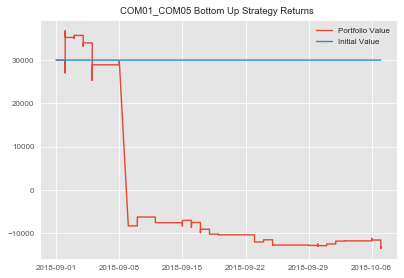

In [272]:
#creating spread
COM01_COM05_bottom_up.create_spread()
#generating signals
COM01_COM05_bottom_up.generate_signals()
#getting performance
#notice that we are passing in our equal weight amount here
COM01_COM05_bottom_up.create_returns(30000,'COM01_COM05 Bottom Up')

In [274]:
#creating instance of updated statarb strategy
COM03_COM05_bottom_up=statarb_update(COM03_test, COM05_test, 2,17,-2, 2,17,'09/01/18','10/07/18',COM03_COM05_regime_predictions,'Target',avoid1=0,target1=1,
                  exit_zscore=0)

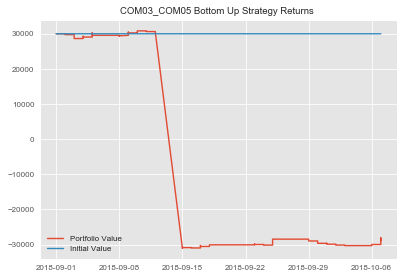

In [275]:
#creating spread
COM03_COM05_bottom_up.create_spread()
#generating signals
COM03_COM05_bottom_up.generate_signals()
#getting performance
#notice that we are passing in our equal weight amount here
COM03_COM05_bottom_up.create_returns(30000,'COM03_COM05 Bottom Up')

In [276]:
#creating instance of updated statarb strategy
COM05_COM03_bottom_up=statarb_update(COM05_test, COM03_test, 2,17,-2, 2,17,'09/01/18','10/07/18',COM05_COM03_regime_predictions,'Target',avoid1=0,target1=1,
                  exit_zscore=0)

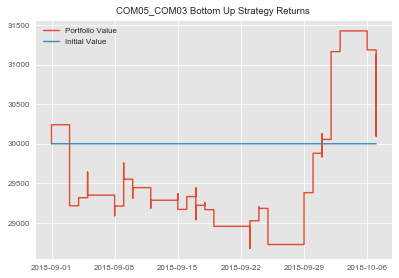

In [277]:
#creating spread
COM05_COM03_bottom_up.create_spread()
#generating signals
COM05_COM03_bottom_up.generate_signals()
#getting performance
#notice that we are passing in our equal weight amount here
COM05_COM03_bottom_up.create_returns(30000,'COM05_COM03 Bottom Up')

### Step 6: Getting Performance Metrics

In [278]:
#creating dataframe for Bottom Up Portfolio
bottom_up_portfolio=pd.DataFrame()
bottom_up_portfolio['COM01_COM05']=COM01_COM05_bottom_up.portfolio['Portfolio Value']
bottom_up_portfolio['COM03_COM05']=COM03_COM05_bottom_up.portfolio['Portfolio Value']
bottom_up_portfolio['COM05_COM03']=COM05_COM03_bottom_up.portfolio['Portfolio Value']
bottom_up_portfolio['Cash']=10000
bottom_up_portfolio['Total Portfolio Value']=bottom_up_portfolio['COM01_COM05']+bottom_up_portfolio['COM03_COM05']+bottom_up_portfolio['COM05_COM03']+bottom_up_portfolio['Cash']

In [279]:
#adding returns column to Bottom Up Dataframe
bottom_up_portfolio['Returns']=np.log(bottom_up_portfolio['Total Portfolio Value']/bottom_up_portfolio['Total Portfolio Value'].shift(1))

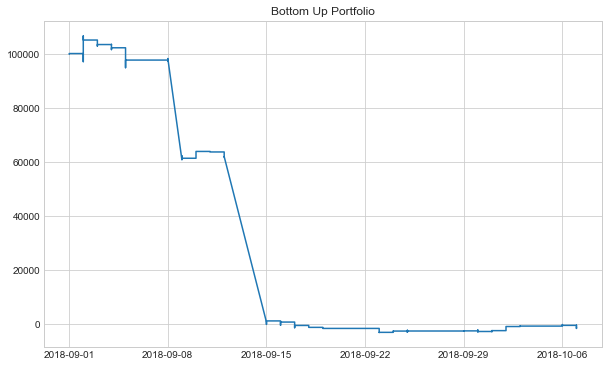

In [280]:
# plot the equity curve of our Bottom Up Portfolio
plt.figure(figsize=(10,6))
plt.plot(bottom_up_portfolio['Total Portfolio Value'])
plt.title('Bottom Up Portfolio')
plt.show()

In [281]:
bottom_up_portfolio_mu=bottom_up_portfolio['Returns'].mean()
bottom_up_portfolio_sigma=bottom_up_portfolio['Returns'].std()

#recall that we initialized our interest assumption earlier
bottom_up_portfolio_sharpe=(bottom_up_portfolio_mu-rate)/bottom_up_portfolio_sigma

In [282]:
bottom_up_portfolio_sharpe

-0.14499455128225736

### Portfolio Construction: Efficient Frontier

In [283]:
# Initialzing Mus and Sigmas
# COM01 & COM05
COM01_COM05_mu=COM01_COM05.mu
COM01_COM05_sigma=COM01_COM05.sigma
# COM03 & COM05
COM03_COM05_mu=COM03_COM05.mu
COM03_COM05_sigma=COM03_COM05.sigma
# COM05 & COM03
COM05_COM03_mu=COM05_COM03.mu
COM05_COM03_sigma=COM05_COM03.sigma

In [284]:
#computing log returns for our portfolio values
returns=np.log(equally_weighted[['COM01_COM05','COM03_COM05','COM05_COM03']]/equally_weighted[['COM01_COM05','COM03_COM05','COM05_COM03']].shift(1))

In [285]:
#checking returns
returns.head()

,COM01_COM05,COM03_COM05,COM05_COM03
0,NaN,NaN,NaN
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [292]:
avg_returns=returns.mean()*252

In [293]:
#checking average annualized returns
avg_returns

COM01_COM05   -0.013105
COM03_COM05    0.004904
COM05_COM03   -0.009356
dtype: float64

In [289]:
covariance_matrix=returns.cov()*252

In [290]:
covariance_matrix

,COM01_COM05,COM03_COM05,COM05_COM03
COM01_COM05,2.087232e-02,2.551377e-07,-4.867995e-07
COM03_COM05,2.551377e-07,1.876906e-03,1.877183e-03
COM05_COM03,-4.867995e-07,1.877183e-03,4.623105e-03


In [294]:
#assigning weights
weights=np.random.random(len(returns.columns))
weights/=np.sum(weights)

In [295]:
#reviewing weights
weights

array([0.50836597, 0.11443908, 0.37719495])

In [296]:
#importing optimization function
import scipy.optimize as sco

In [297]:
def efficient_frontier(returns,rate=0.015):
   
    #creating a list to hold our portfolio returns, variance and Sharpe values
    portfolio_returns=[]
    portfolio_volatility=[]
    p_sharpes=[]
    
   # returns=returns_df
    
    for i in range(500):
        #assigning weights
        weights=np.random.random(len(returns.columns))
        weights/=np.sum(weights)

        #getting returns
        current_return=np.sum(returns.mean()*weights)*252
        portfolio_returns.append(current_return)
        
        #getting variances
        variance=np.dot(weights.T,np.dot(returns.cov()*252,weights))
        #getting volatility
        volatility=np.sqrt(variance)
        portfolio_volatility.append(volatility)
        
        #getting Sharpe ratios
        ratio=(current_return-rate)/volatility
        #storing Sharpe in list
        p_sharpes.append(ratio)
    
    p_returns=np.array(portfolio_returns)
    p_volatility=np.array(portfolio_volatility)
    p_sharpes=np.array(p_sharpes)
    
    #plotting
    plt.figure(figsize=(10,6))
    plt.scatter(p_volatility,p_returns,c=p_sharpes, marker='o')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()
    
    return

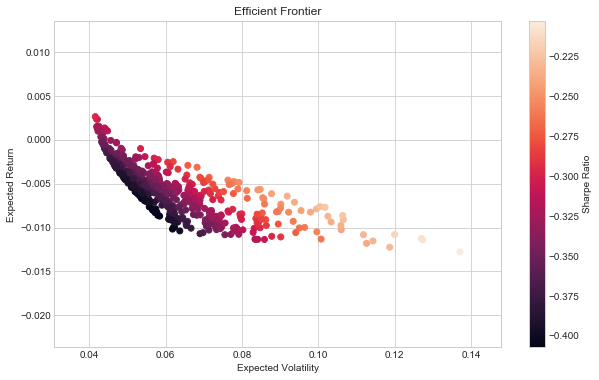

In [298]:
efficient_frontier(returns.fillna(0))

In [299]:
def stats(weights,rate=0.015):
    weights=np.array(weights)
    p_returns=np.sum(returns.mean()*weights)*252
    p_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    p_sharpe=(p_returns-rate)/p_volatility
    
    return np.array([p_returns,p_volatility,p_sharpe])

In [300]:
#testing stats method
stats(weights)

array([-0.00963009,  0.07898353, -0.31183827])

In [301]:
#creating function for optimization
def minimize_func(weights):
        return -stats(weights)[2]

In [302]:
#testing optimization function
minimize_func(weights)

0.3118382739316091

In [303]:
def get_optimal_weights(weights):
    #Finding Most Optimal Weights
    #variables for optimization
    constraints=({'type':'eq','fun':lambda x: np.sum(x)-1})
    bounds=tuple((0,1) for x in range(len(returns.columns)))

    starting_weights=len(returns.columns)*[1./len(returns.columns)]
    most_optimal=sco.minimize(minimize_func,starting_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    best_weights=most_optimal['x'].round(3)

    return best_weights, print('Weights:',best_weights)

In [304]:
#storing optimal weights in a variable
optimal_weights=get_optimal_weights(weights)

Weights: [1. 0. 0.]


In [305]:
#total allocation variable
total_allocation=90000 #100k less 10k cash

#COM01_COM05 Allocation
COM01_COM05_allocation=round(total_allocation*optimal_weights[0][0],2)

#COM05_COM03 Allocation
COM05_COM03_allocation=round(total_allocation*optimal_weights[0][2],2)

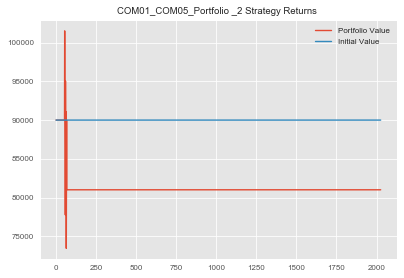

In [307]:
#creating 2nd instance of first pair
COM01_COM05_2=statarb(COM01_test_price_series,COM05_test_price_series,17,-2,2,17,COM01_test.iloc[0],COM01_test.iloc[-1])
COM01_COM05_2.create_spread()
COM01_COM05_2.generate_signals()

#notice here we're using our updated allocation
COM01_COM05_2.create_returns(COM01_COM05_allocation,'COM01_COM05_Portfolio _2')

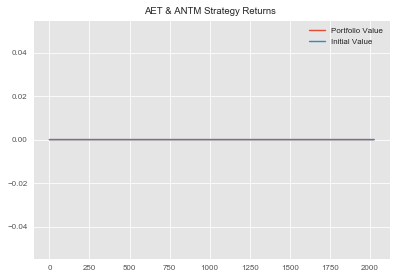

In [309]:
#COM05_COM03 2nd implementation
COM05_COM03_2=statarb(COM05_test_price_series,COM03_test_price_series,12,-2,2,12,COM05_test.iloc[0],COM05_test.iloc[-1])
COM05_COM03_2.create_spread()
COM05_COM03_2.generate_signals()
COM05_COM03_2.create_returns(COM05_COM03_allocation,'AET & ANTM')

In [310]:
# Creating the Efficient Frontier Portfolio
#creating dataframe for Efficient Frontier Portfolio
efficient_frontier_portfolio=pd.DataFrame()
efficient_frontier_portfolio['COM01_COM05']=COM01_COM05_2.portfolio['Portfolio Value']
efficient_frontier_portfolio['COM05_COM03']=COM05_COM03_2.portfolio['Portfolio Value']
efficient_frontier_portfolio['Cash']=10000
efficient_frontier_portfolio['Total Portfolio Value']=efficient_frontier_portfolio['COM01_COM05']+efficient_frontier_portfolio['COM05_COM03']+efficient_frontier_portfolio['Cash']

In [311]:
#adding returns column to Efficient Frontier Dataframe
efficient_frontier_portfolio['Returns']=np.log(efficient_frontier_portfolio['Total Portfolio Value']/efficient_frontier_portfolio['Total Portfolio Value'].shift(1))

In [312]:
#checking head of Efficient Frontier Portfolio dataframe
efficient_frontier_portfolio.head()

,COM01_COM05,COM05_COM03,Cash,Total Portfolio Value,Returns
0,90000.0,0.0,10000,100000.0,NaN
1,90000.0,0.0,10000,100000.0,0.0
2,90000.0,0.0,10000,100000.0,0.0
3,90000.0,0.0,10000,100000.0,0.0
4,90000.0,0.0,10000,100000.0,0.0


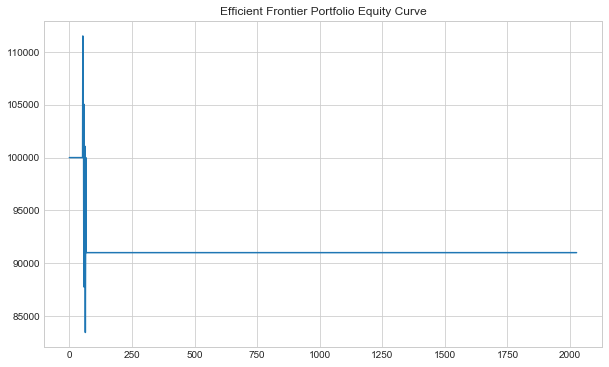

In [313]:
#plotting Equity Curve for Efficient Frontier Portfolio
plt.figure(figsize=(10,6))
plt.plot(efficient_frontier_portfolio['Total Portfolio Value'])
plt.title('Efficient Frontier Portfolio Equity Curve')
plt.show()

In [314]:
efficient_frontier_portfolio_mu=efficient_frontier_portfolio['Returns'].mean()
efficient_frontier_portfolio_sigma=efficient_frontier_portfolio['Returns'].std()

#recall that we initialized our interest assumption earlier
efficient_frontier_portfolio_sharpe=(efficient_frontier_portfolio_mu-rate)/efficient_frontier_portfolio_sigma

In [315]:
efficient_frontier_portfolio_sharpe

-1.846535052920837